# Just use this notebook to compute TPM values for gene expression, and overlap two datasets to see how many expressed genes each has in common.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats

In [2]:
#input_counts = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/featurecounts/counts.txt'
input_counts1 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/counts.txt'
input_counts2 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200328_kris_rnaseq/results/counts.txt'

output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/'

In [3]:
def counts_to_rpkm(feature_counts_table):
    """
    takes featureCounts counts.txt and returns RPKM
    """
    counts = feature_counts_table.ix[:,5:]
    lengths = feature_counts_table['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

def counts_to_tpm(counts_table, skip_col=5):
    """
    simple function that converts a featureCounts pandas Dataframe
    into a TPM dataframe.
    
    :param counts_table: pandas.DataFrame() 
        either a featureCounts table (first five cols contain non-count info,
        the rest contain raw counts) or a generic counts table (use skip_col=0
        in this case)
    :return tpm: pandas.DataFrame
    """
    rpkm = counts_to_rpkm(counts_table)
    tpm = rpkm.div(rpkm.sum())*pow(10,6)
    return tpm

counts_table1 = pd.read_csv(input_counts1, sep='\t', index_col=0, skiprows=1)
counts_table2 = pd.read_csv(input_counts2, sep='\t', index_col=0, skiprows=1)

counts_table1.head()

,Chr,Start,End,Strand,Length,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_10_S60_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample11_S29_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample12_S30_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample13_S31_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample14_S13_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,...,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_3_S57_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_40_S68_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample41_S41_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample42_S42_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample4_S25_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample5_S26_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_6_S58_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample7_S27_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample8_S28_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_9_S59_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11869;11872;11874;12010;12179;12595;12613;1261...,12227;12227;12227;12057;12227;12721;12697;1272...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,1756,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000227232.4,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14363;14363;14363;14404;14411;14970;14970;1497...,14829;14829;14829;14501;14502;15038;15038;1503...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,2073,58,13,10,20,60,...,69,37,8,16,22,13,49,20,27,51
ENSG00000243485.2,chr1;chr1;chr1;chr1;chr1;chr1,29554;30267;30366;30564;30976;30976,30039;30667;30503;30667;31109;31097,+;+;+;+;+;+,1021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,chr1;chr1;chr1;chr1;chr1,34554;35245;35277;35721;35721,35174;35481;35481;36081;36073,-;-;-;-;-,1219,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268020.2,chr1;chr1;chr1,52473;53049;54830,53312;53067;54936,+;+;+,947,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tpm1 = counts_to_tpm(counts_table1)
tpm1 += 1
tpm2 = counts_to_tpm(counts_table2)
tpm2 += 1

tpm = pd.merge(tpm1, tpm2, how='outer', left_index=True, right_index=True)
tpm.head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_10_S60_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample11_S29_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample12_S30_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample13_S31_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample14_S13_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample15_S14_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample16_S32_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample17_S15_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample18_S16_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample19_S17_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,...,TI_50_S10_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_52_S11_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_53_S12_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_55_S13_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_56_S14_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_58_S15_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_59_S16_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_5_S4_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_7_S5_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_8_S6_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,1.000000,1.491439,1.488257,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.148742,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.071874
ENSG00000227232.4,4.482054,6.411752,5.135936,8.323732,8.225881,7.427103,7.899332,8.574154,6.567912,8.937778,...,6.155293,2.93125,3.542565,4.672135,4.537722,3.887005,4.506601,3.820402,6.164328,4.835657
ENSG00000243485.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ENSG00000237613.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ENSG00000268020.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
for c in tpm.columns:
    print(c)

/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_10_S60_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample11_S29_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample12_S30_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample13_S31_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample14_S13_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample15_S14_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAli

In [6]:
# key1 = 'results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# key2 = 'results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'

key1 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_38_S66_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
key2 = 'TI_55_S13_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'

In [7]:
genes1 = set(tpm[tpm[key1]>0].index)
genes2 = set(tpm[tpm[key2]>0].index)

In [8]:
len(genes1), len(genes2)

(57820, 57820)

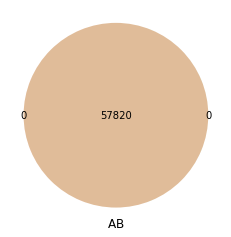

In [9]:
venn2([genes1, genes2])

# Now perform correlation

In [10]:
tpm[[key1, key2]].corr()

,/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_38_S66_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,TI_55_S13_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
/home/bay001/projects/kris_apobec_20200121/permanent_data/20200309_kris_rnaseq_all/Sample_38_S66_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,1.000000,0.942855
TI_55_S13_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,0.942855,1.000000


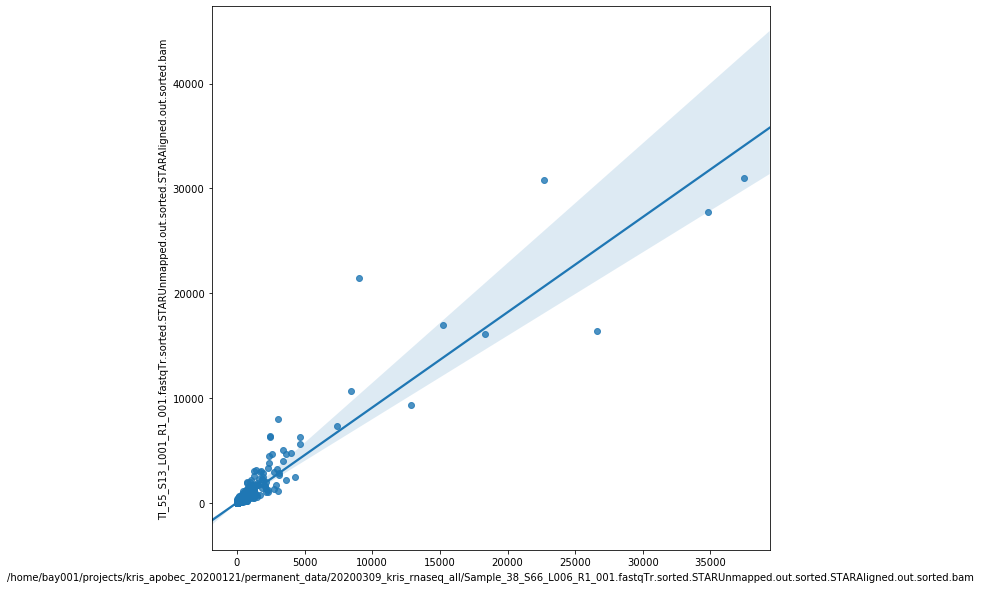

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.regplot(
    x=key1, 
    y=key2, 
    data=tpm[[key1, key2]],
)
ax.set_xlim=(0, max(tpm[key1]))
ax.set_ylim=(0, max(tpm[key2]))

In [12]:
def r2spearman(x, y):
    return stats.spearmanr(x, y)[0] ** 2

def r2pearson(x, y):
    return stats.pearsonr(x, y)[0] ** 2

def plot_correlation(df, col1, col2, stat_func, output_dir):
    plot = sns.jointplot(
        x=col1, 
        y=col2, 
        data=np.log2(df), 
        kind="reg", 
        stat_func=stat_func,
        xlim=(np.log2(df).min().min(), np.log2(df).max().max()), 
        ylim=(np.log2(df).min().min(), np.log2(df).max().max())
    )
    plot.savefig(os.path.join(output_dir, '{}.{}.svg'.format(os.path.basename(col1), os.path.basename(col2))))
    plot.savefig(os.path.join(output_dir, '{}.{}.png'.format(os.path.basename(col1), os.path.basename(col2))))

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/seaborn/axisgrid.py:1741: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()
/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


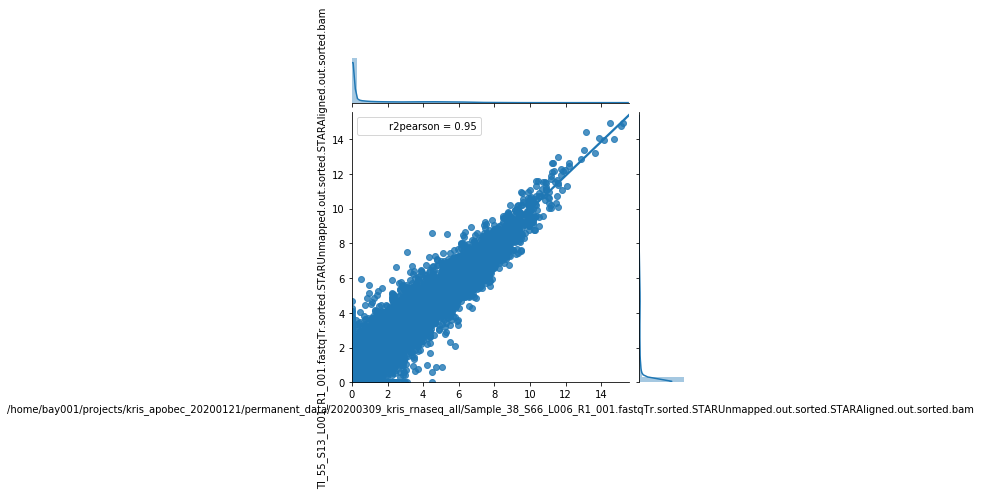

In [13]:
plot_correlation(tpm, key1, key2, r2pearson, output_dir)

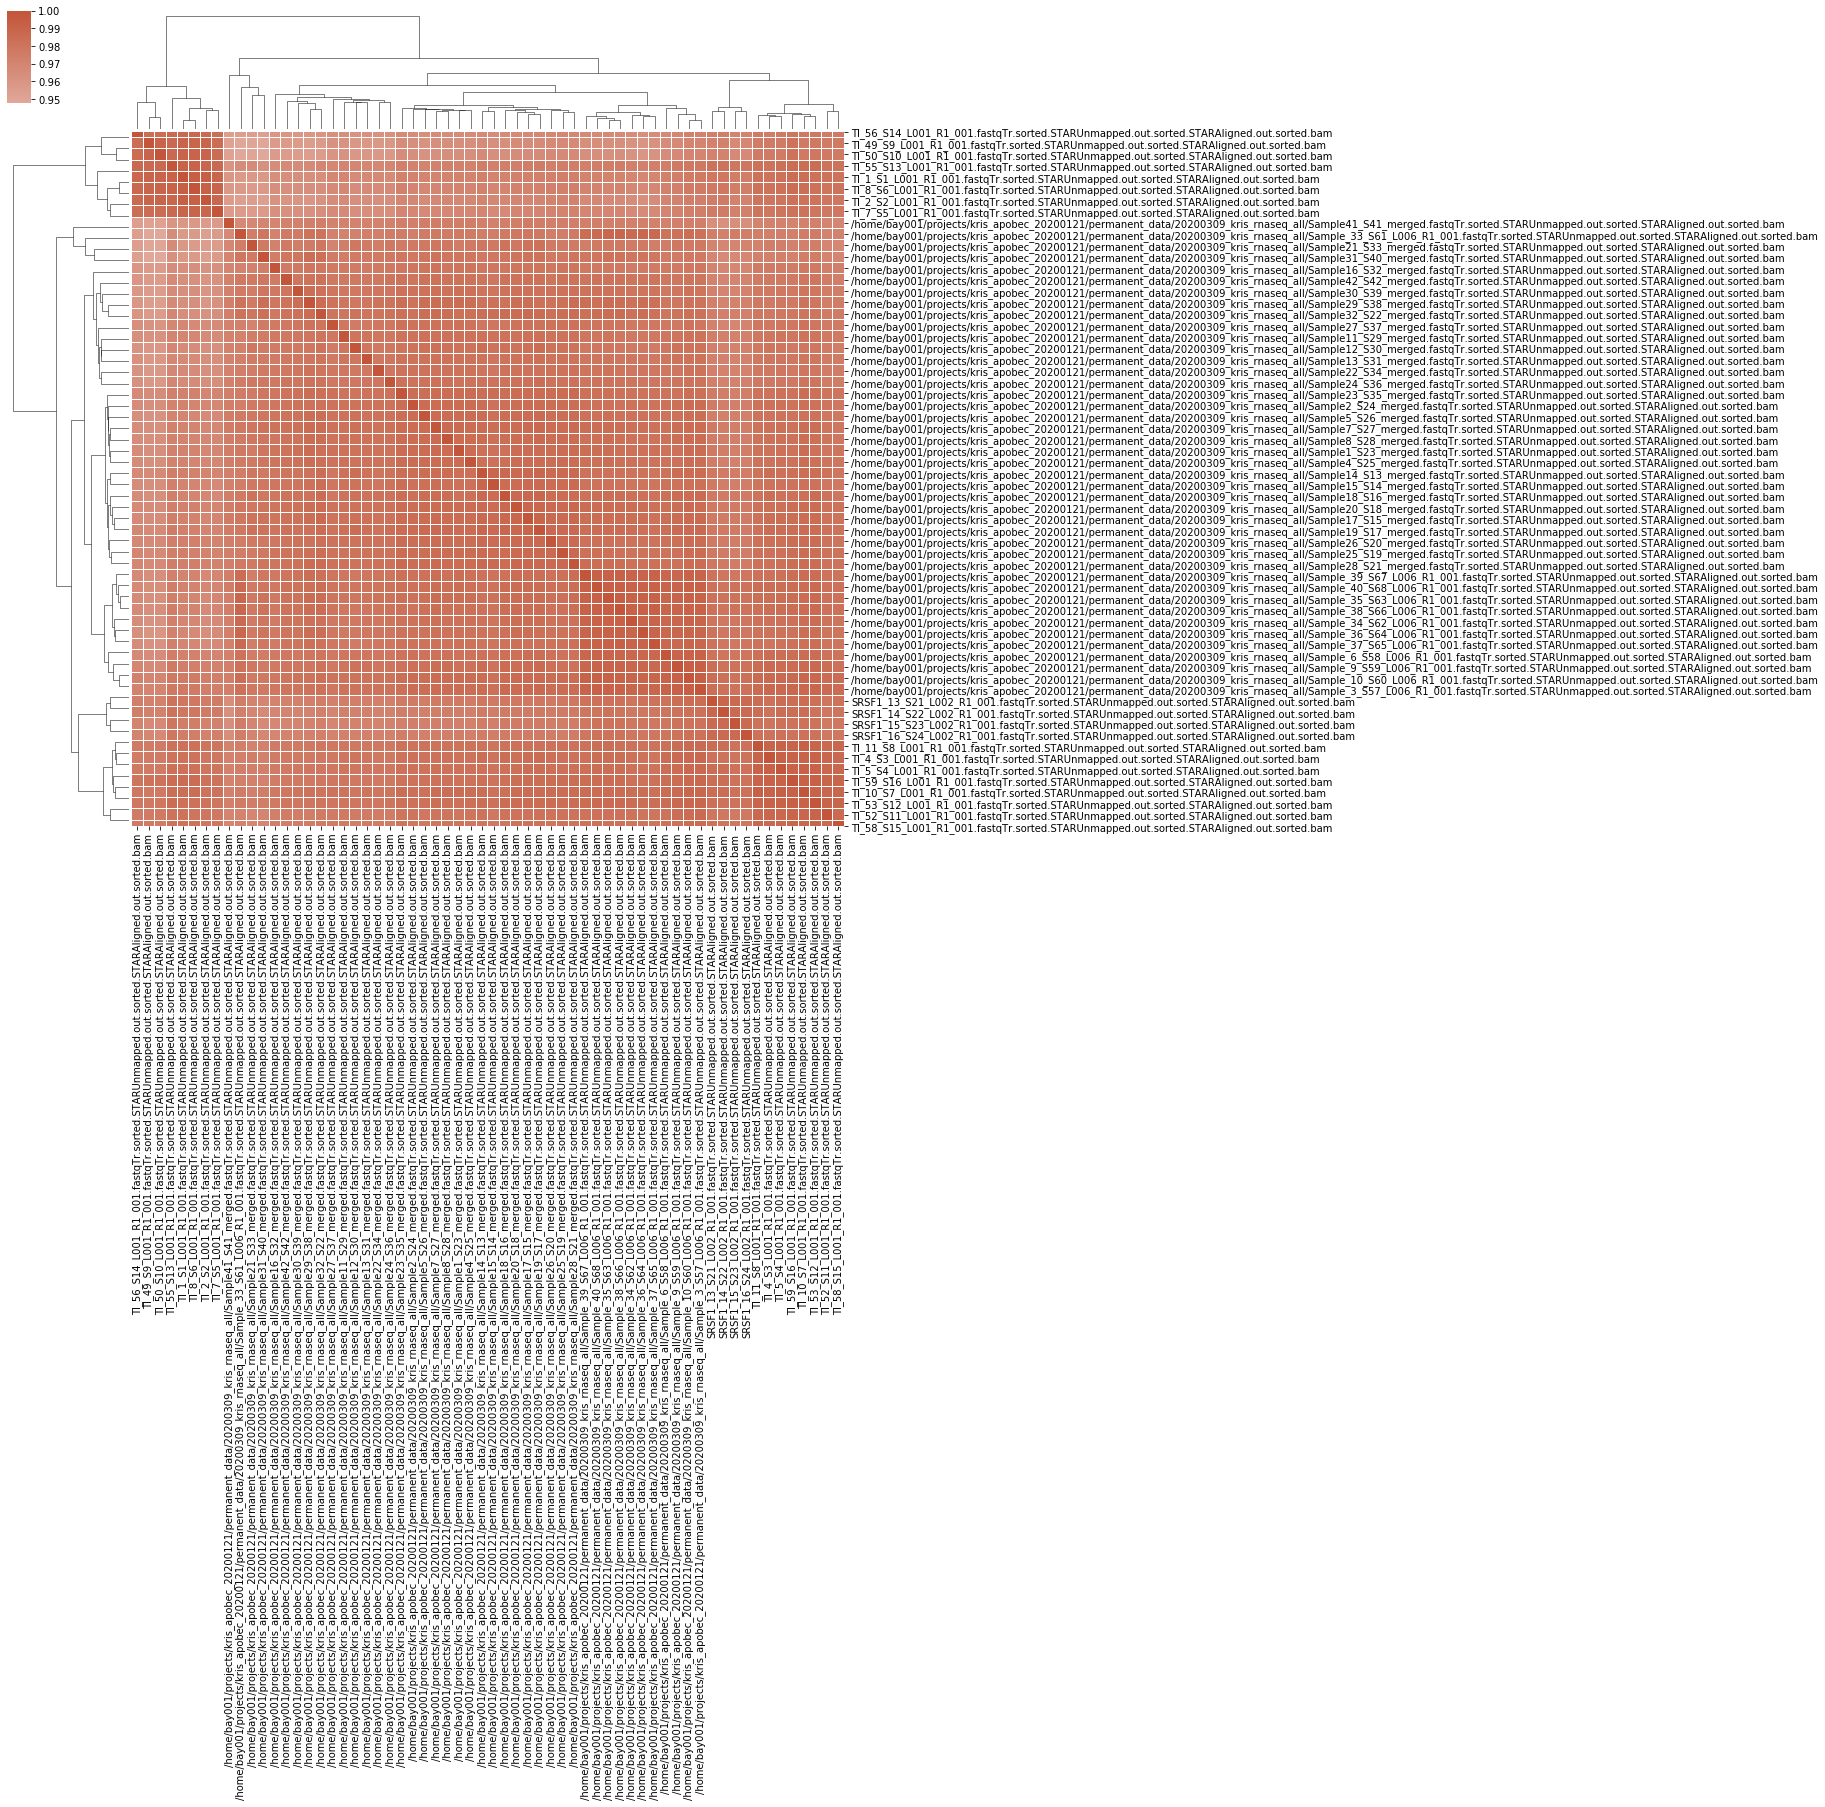

In [14]:
corr = np.log2(tpm).corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.clustermap(corr, center=0.9, cmap=cmap, linewidths=.01, cbar_kws={"shrink": .5}, figsize=(15, 15))
fig.savefig(os.path.join(output_dir, "{}_corrplot.svg".format("Sample38_TI55")))